In [1]:
import numpy as np
import pandas as pd
import warnings; warnings.simplefilter('ignore')

In [2]:
# plotting
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [4]:
#sqqq and tqqq are taken as IBdata feed not for SPXS 
path = '/home/octo/Dropbox/IQ_data/'
spy=pd.read_csv(path + 'SPY.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)
sqqq= pd.read_csv(path + 'SQQQ.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)
tqqq=pd.read_csv(path + 'TQQQ.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)
spy=spy.tail(140000)
sqqq=sqqq.tail(140000)
tqqq=tqqq.tail(140000)

In [56]:
df_svm=pd.DataFrame(data=spy.open)
df_svm['close']=pd.DataFrame(data=spy.close)
df_svm['ch']=pd.DataFrame(data=(spy.open-spy.close.shift(-60))).shift(60)
df_svm['j']=pd.rolling_sum(pd.DataFrame(data=(spy.open-spy.close.shift(-12))),5).shift(12)
df_svm['ju'] = np.where(df_svm['j']>0.25,1,0)
df_svm['jd'] = np.where(df_svm['j']<-0.25,-1,0)
df_svm['vol_u']=np.where(pd.DataFrame(data=spy.volume>pd.rolling_mean(spy.volume,180)),1,0)
df_svm['vol_d']=np.where(pd.DataFrame(data=spy.volume<pd.rolling_mean(spy.volume,180)),-1,0)
P=(spy.high+spy.low+spy.close)/3
df_svm['R2']=P+(spy.high-spy.low)+0.02
df_svm['R2']=pd.rolling_mean(df_svm['R2'], window=60)
df_svm['S2']=P-(spy.high-spy.low)-0.02
df_svm['S2']=pd.rolling_mean(df_svm['S2'], window=60)
df_svm['vwap'] =pd.rolling_sum(spy.volume*P,60)/pd.rolling_sum(spy.volume,60)
df_svm['spread'] =df_svm['open'] -df_svm['vwap']

#### Strategy Based on graph below

##### 1. np.abs(df_svm['j']) should be less than 0.25
##### 2. np.abs(df_svm['spread']) should be less than 0.03
##### 3. NL should be below NLq

#### Reason of jump

##### 1. np.abs(df_svm['j'])>0.25
##### 2. np.abs(df_svm['spread'])>0.03
#### 3. NL>NLq then jump due to reversion theory

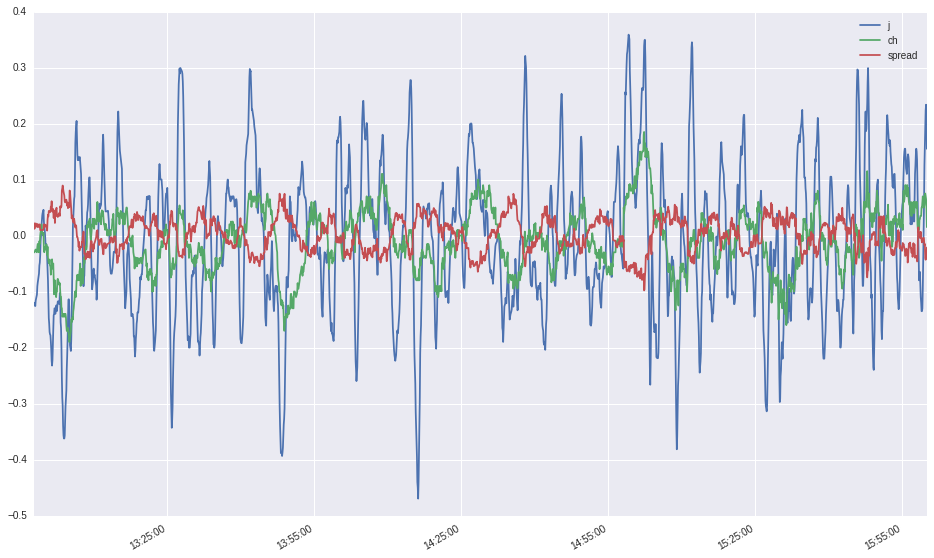

In [42]:
df_svm[['j','ch','spread']].tail(2000).plot(figsize=(16, 10))
plt.show()

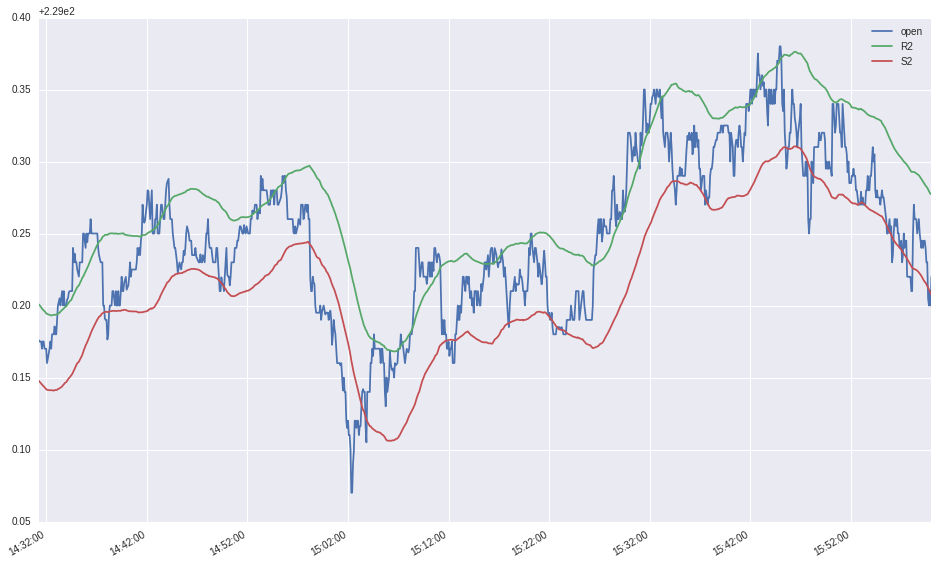

In [39]:
df_svm[['open','R2','S2']].tail(1000).plot(figsize=(16, 10))
plt.show()

//#retracement 24%,38%,50%,62% and 124%. NEED to optimize

R3=VWAP+(HHV(H_SPY,360)-LLV(L_SPY,360))*0.01;

S3=VWAP-(HHV(H_SPY,360)-LLV(L_SPY,360))*0.01;


In [111]:
df_svm['R3']=df_svm.vwap+(pd.rolling_max(spy.high,360)-pd.rolling_min(spy.low,360))*0.12
df_svm['S3']=df_svm.vwap-(pd.rolling_max(spy.high,360)-pd.rolling_min(spy.low,360))*0.12

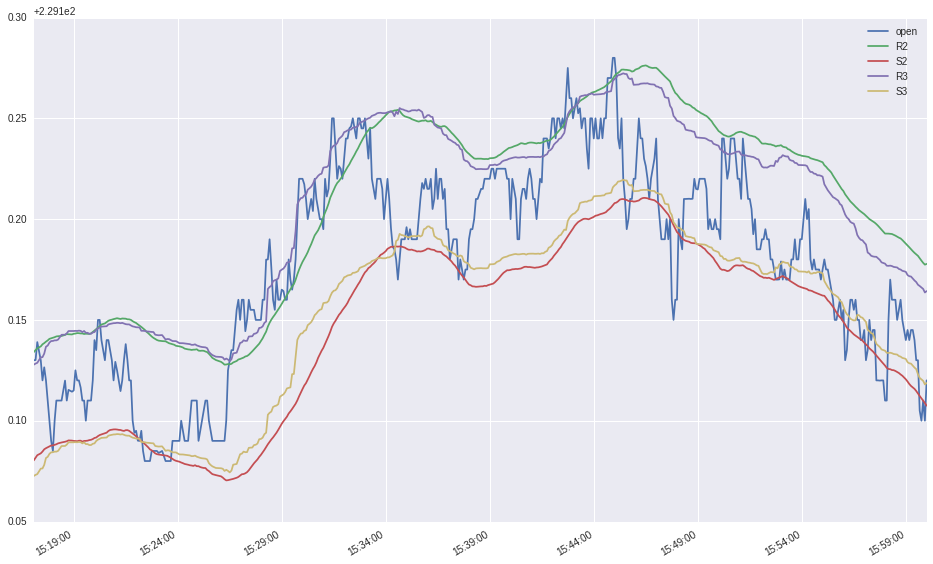

In [112]:
df_svm[['open','R2','S2','R3','S3']].tail(500).plot(figsize=(16, 10))
plt.show()

// Deceisive part. NL at middle, UP or down. !!!

NL=230.90;//SP_SPY;

UL=NL+0.6;

LL=NL-0.6;

//MarketON and

In [92]:
df_svm['NL']=pd.DataFrame(data=abs(spy.open-spy.close.shift(-400)).shift(400))
df_svm['NLq']=pd.rolling_quantile(df_svm.NL,400,.9)

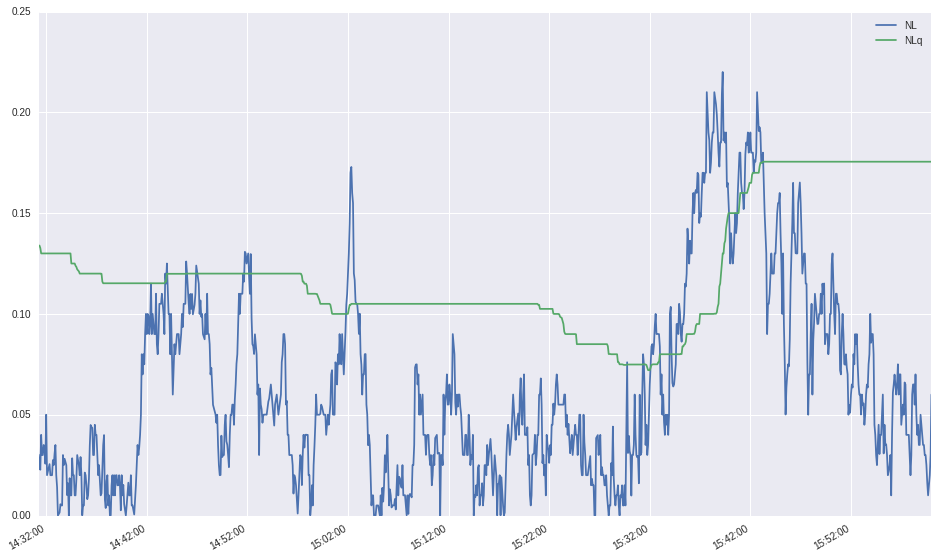

In [93]:
df_svm[['NL','NLq']].tail(1000).plot(figsize=(16, 10))
plt.show()

In [81]:
np.mean(pd.rolling_quantile(df_svm.NL,10,.75))

0.21892262824968098